In [240]:
import numpy as np
import os
import pickle
import json

from shutil import unpack_archive
from collections import OrderedDict, defaultdict

import matplotlib
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import matplotlib.lines as mlines
import seaborn as sns
%matplotlib inline
from utilsplot import tsplot
import pandas as pd

In [71]:
# sns.set_style("white")
# matplotlib.rc('axes', titlesize=13, labelsize=20)
# matplotlib.rc('legend', fontsize=16)
# matplotlib.rc('xtick', labelsize=20)
# matplotlib.rc('ytick', labelsize=20)

In [3]:
# Parser for data
def parse_results(res):
    parsed_res = []
    for k, v in res.items():
        if k == 'episode':
            continue
        a1, a2 = k.split('_vs_')
        a2, m = a2.split('_')
        if m.endswith("1"):
            parsed_res.append((a1, a2, m[:-1], v))
        if m.endswith("2"):
            parsed_res.append((a2, a1, m[:-1], v))
    return parsed_res

In [21]:
# Parser for data
def parse_results(res):
    parsed_res = []
    for k, v in res.items():
        if k == 'episode':
            continue
        if k.endswith("1"):
            parsed_res.append((1,k[:-1], v))
        if k.endswith("2"):
            parsed_res.append((2 , k[:-1], v))
    return parsed_res

In [232]:
def get_episodes(length,repeat):
    return np.repeat(np.arange(length)[None, :], repeat, axis=0)

In [22]:
parse_results(json.loads(l.strip()))

[(1, 'ret', -1.0030191802978523), (2, 'ret', -1.0026841735839853)]

In [59]:
axes

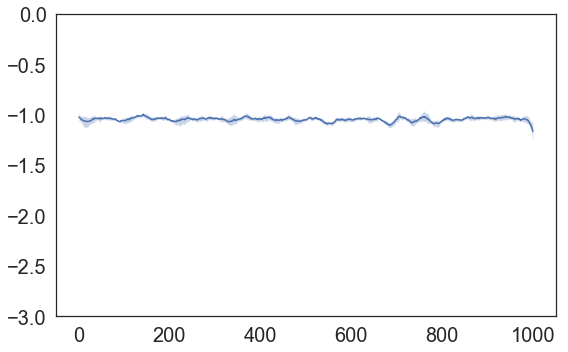

In [72]:
fig, axes = plt.subplots(1, 1, figsize=(8, 5))

res = results['IPD']
ax = axes
#ax.set_title(a1 + ' vs. ' + a2, fontsize=24)
episodes = np.repeat(np.arange(len(res[(1, 'ret', 0)] ))[None, :], len(os.listdir(IPD_PATH)), axis=0)
rets = np.asarray([res[(1, 'ret', seed)] for seed in range(len(os.listdir(IPD_PATH)))])
tsplot(episodes, rets, ax, ci=68, resample=1000, window_length=51)
ax.set_ylim([-3., 0.])

fig.tight_layout()

In [76]:
path%1

'logs/IPD/train/seed-1/progress.json'

In [102]:
path="logs/IPD/seed-%d/progress.json"
df=pd.read_json(path%0,orient="records",lines=True)
#df=pd.read_json(ljson,lines=True)

In [342]:
PATH_TNT_DIR='logs/TNT/p/IPD/50'
PATH_TNT_SEED='logs/TNT/p/IPD/50/seed-%d/progress.json'
numseed=len(os.listdir(PATH_TNT_DIR))
seed_r=range(numseed)

In [343]:
df1=pd.read_json(path_or_buf=PATH_TNT_SEED%0,orient="records",lines=True)

dfs=[pd.read_json(path_or_buf=PATH_TNT_SEED%seed,orient="records",lines=True) for seed in seed_r]

True

In [284]:
def get_data(dfs,p1,p2,el,seeds,ind=1):
    col= "{}_vs_{}_{}{}".format(p1,p2,el,ind) if "{}_vs_{}_{}{}".format(p1,p2,el,ind) in dfs[0].columns else "{}_vs_{}_{}2".format(p2,p1,el)
    return np.array([dfs[i][col] for i in seeds])
players=["NL-PG","LOLA"]

In [ ]:
tsplot(np.array([dfs[i]["episode"] for i in range(numseed)]),
       np.array([dfs[i]["NL-PG_vs_LOLA_ret1"] for i in range(numseed)]), 
       ax, ci=90, color=colors[-np.random.randint(10)], 
       resample=1000, window_length=51)

colors = sns.color_palette()
tsplot(np.array([dfs[i]["episode"] for i in range(numseed)]), 
       np.array([dfs[i]["NL-PG_vs_LOLA_ret2"] for i in range(numseed)]),
       ax, ci=90, color=colors[-np.random.randint(10)], 
       resample=1000, window_length=51)

In [ ]:
fig, ax = plt.subplots(1, 1, figsize=(7, 5))
ax.set_ylabel("Average reward per step")
ax.set_xlabel("Episode")
for p in players:
    ret=0.
    for pp in players:
        ret+=get_data(dfs,p,pp,'ret',seed_r)
    ret/=len(players)
    tsplot(np.array([dfs[i]["episode"] for i in range(numseed)]), 
       ret,
       ax, ci=90, color=colors[-np.random.randint(10)], 
       resample=1000, window_length=51)

ax.set_ylim([-2.6, -0.5])
ax.legend(['NL', 'LOLA'], ncol=3)
fig.tight_layout()

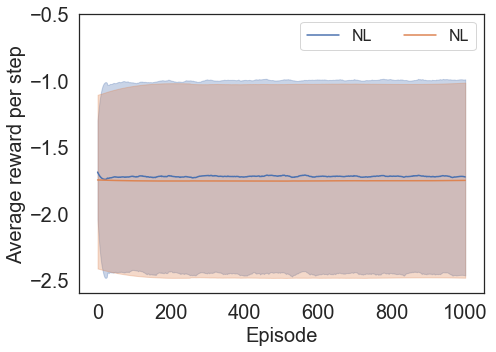

In [312]:
fig, ax = plt.subplots(1, 1, figsize=(7, 5))
ax.set_ylabel("Average reward per step")
ax.set_xlabel("Episode")

tsplot(np.array([dfs[i]["episode"] for i in range(numseed)]), 
       get_data(dfs,players[0],players[0],'ret',seed_r),
       ax, ci=90, color=colors[-10], 
       resample=1000, window_length=51)

tsplot(np.array([dfs[i]["episode"] for i in range(numseed)]), 
       get_data(dfs,players[0],players[0],'ret',seed_r,ind=2),
       ax, ci=90, color=colors[-9], 
       resample=1000, window_length=501)

ax.set_ylim([-2.6, -0.5])
ax.legend(['NL', 'NL'], ncol=3)
fig.tight_layout()

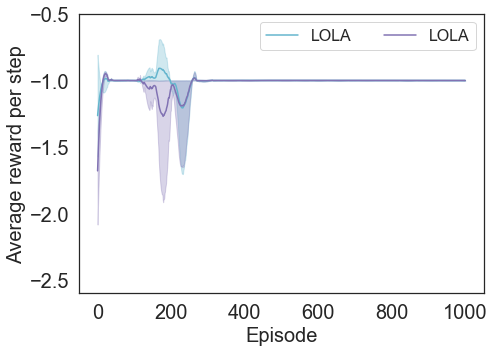

In [296]:
fig, ax = plt.subplots(1, 1, figsize=(7, 5))
ax.set_ylabel("Average reward per step")
ax.set_xlabel("Episode")

tsplot(np.array([dfs[i]["episode"] for i in range(numseed)]), 
       get_data(dfs,players[1],players[1],'ret',seed_r),
       ax, ci=90, color=colors[-1], 
       resample=1000, window_length=51)

tsplot(np.array([dfs[i]["episode"] for i in range(numseed)]), 
       get_data(dfs,players[1],players[1],'ret',seed_r,ind=2),
       ax, ci=90, color=colors[-6], 
       resample=1000, window_length=51)

ax.set_ylim([-2.6, -0.5])
ax.legend(['LOLA', 'LOLA'], ncol=3)
fig.tight_layout()

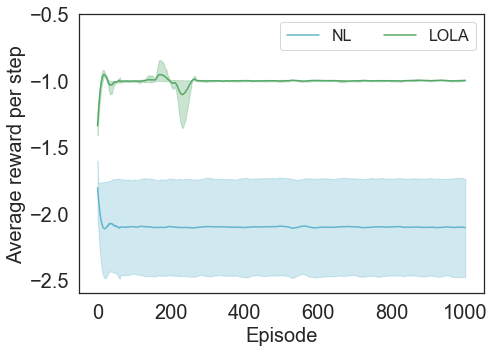

In [313]:
fig, ax = plt.subplots(1, 1, figsize=(7, 5))
ax.set_ylabel("Average reward per step")
ax.set_xlabel("Episode")

for p in players:
    ret=0.
    for pp in players:
        ret+=get_data(dfs,p,pp,'ret',seed_r)
    ret/=len(players)
    tsplot(np.array([dfs[i]["episode"] for i in range(numseed)]), 
       ret,
       ax, ci=90, color=colors[-np.random.randint(10)], 
       resample=1000, window_length=51)

ax.set_ylim([-2.6, -0.5])
ax.legend(['NL', 'LOLA'], ncol=3)
fig.tight_layout()
#fig.savefig("tnt-results-IPD.pdf")

In [ ]:
sns.lineplot(x="episode",y="LOLA_vs_LOLA_ret1",data=dfs[i])

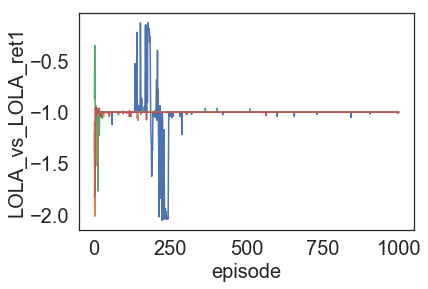

In [253]:
for i in seed_r:
    sns.lineplot(x="episode",y="LOLA_vs_LOLA_ret1",data=dfs[i])


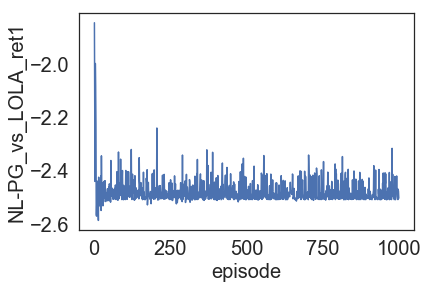

In [247]:
sns.lineplot(x=df1.episode,y=df1["NL-PG_vs_LOLA_ret1"])

In [314]:
df1=dfs[0]

In [317]:
dfs[0].columns

Index(['LOLA_vs_LOLA_pi1', 'LOLA_vs_LOLA_pi2', 'LOLA_vs_LOLA_ret1',
       'LOLA_vs_LOLA_ret2', 'LOLA_vs_LOLA_v1-1', 'LOLA_vs_LOLA_v1-2',
       'LOLA_vs_LOLA_v2-1', 'LOLA_vs_LOLA_v2-2', 'LOLA_vs_LOLAtheta_1_0',
       'LOLA_vs_LOLAtheta_1_1', 'LOLA_vs_LOLAtheta_1_2',
       'LOLA_vs_LOLAtheta_1_3', 'LOLA_vs_LOLAtheta_1_4',
       'LOLA_vs_LOLAtheta_2_0', 'LOLA_vs_LOLAtheta_2_1',
       'LOLA_vs_LOLAtheta_2_2', 'LOLA_vs_LOLAtheta_2_3',
       'LOLA_vs_LOLAtheta_2_4', 'NL-PG_vs_LOLA_pi1', 'NL-PG_vs_LOLA_pi2',
       'NL-PG_vs_LOLA_ret1', 'NL-PG_vs_LOLA_ret2', 'NL-PG_vs_LOLA_v1-1',
       'NL-PG_vs_LOLA_v1-2', 'NL-PG_vs_LOLA_v2-1', 'NL-PG_vs_LOLA_v2-2',
       'NL-PG_vs_LOLAtheta_1_0', 'NL-PG_vs_LOLAtheta_1_1',
       'NL-PG_vs_LOLAtheta_1_2', 'NL-PG_vs_LOLAtheta_1_3',
       'NL-PG_vs_LOLAtheta_1_4', 'NL-PG_vs_LOLAtheta_2_0',
       'NL-PG_vs_LOLAtheta_2_1', 'NL-PG_vs_LOLAtheta_2_2',
       'NL-PG_vs_LOLAtheta_2_3', 'NL-PG_vs_LOLAtheta_2_4',
       'NL-PG_vs_NL-PG_pi1', 'NL-PG_vs_NL-PG_

In [318]:
players

['NL-PG', 'LOLA']

In [344]:


state=["s0","DD","DC","CD","CC"]
for i in range(5):
    df1[state[i]]=state[i]
proba=[]
for i in range(5):
    proba.append(df1[['%s_vs_%stheta_1_%d'%(players[0],players[0],i),'%s_vs_%stheta_2_%d'%((players[0],players[0],i)),state[i]]])
tl=list(np.asarray(proba[0].values))
for i in range(1,5):
    tl.extend(np.asarray(proba[i].values))
dfp=pd.DataFrame(tl,columns=['p1','p2','s'])

In [345]:
#dfp

In [226]:
dfp.head()

p1            p2   s
0  0.468396  5.554529e-01  s0
1  1.000000  2.793984e-17  s0
2  1.000000  2.793984e-17  s0
3  1.000000  2.793984e-17  s0
4  1.000000  2.793984e-17  s0

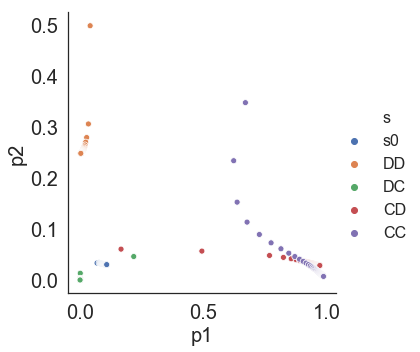

In [346]:
sns.relplot(x="p1", y="p2",hue="s",
            data=dfp)

In [338]:
proba1=[]
for i in range(5):
    proba1.append(df1[['%s_vs_%stheta_1_%d'%(players[0],players[0],i),'%s_vs_%stheta_2_%d'%((players[1],players[1],i)),state[i]]])
tl=list(np.asarray(proba1[0].values))
for i in range(1,5):
    tl.extend(np.asarray(proba1[i].values))
dfp1=pd.DataFrame(tl,columns=['agent1','agent2','state'])

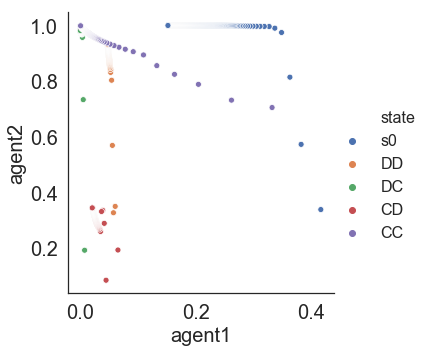

In [340]:

proba1=[]
for i in range(5):
    proba1.append(df1[['%s_vs_%stheta_1_%d'%(players[0],players[0],i),'%s_vs_%stheta_2_%d'%((players[1],players[1],i)),state[i]]])
tl=list(np.asarray(proba1[0].values))
for i in range(1,5):
    tl.extend(np.asarray(proba1[i].values))
dfp1=pd.DataFrame(tl,columns=['agent1','agent2','state'])

sns.relplot(x="agent1", y="agent2",hue="state",
            data=dfp1)

In [336]:
df1=dfs[3]
state=["s0","DD","DC","CD","CC"]

for i in range(5):
    df1[state[i]]=state[i]

IndexError: list index out of range

In [341]:

proba=[]
for i in range(5):
    proba.append(df1[['%s_vs_%stheta_1_%d'%(players[0],players[0],i),'%s_vs_%stheta_2_%d'%((players[0],players[0],i)),state[i]]])
tl=list(np.asarray(proba[0].values))
for i in range(1,5):
    tl.extend(np.asarray(proba[i].values))
dfp=pd.DataFrame(tl,columns=['p1','p2','state'])
sns.relplot(x="p1", y="p2",hue="state",
            data=dfp1)

ValueError: Could not interpret input 'p1'

In [26]:
#results['IPD'][1,'ret',0]

In [94]:
#ljson

In [68]:
# , col="time",
#             hue="smoker", style="smoker", size="size",

In [67]:
# sns.set()
# tips = sns.load_dataset("tips")
# sns.relplot(x="total_bill", y="tip",hue="smoker",style="smoker", size="size",
#             data=tips);

In [69]:
# results = {}

# results['IPD'] = defaultdict(list)
# for seed in range(len(os.listdir("logs/IPD"))):
#     with open("logs/IPD/seed-%d/progress.json" % seed) as fp:
#         lines = fp.readlines()
#     for l in lines:
#         for a1, a2, m, v in parse_results(json.loads(l.strip())):
#             results['IPD'][(a1, a2, m, seed)].append(v)
            

# agents = ['NL-PG', 'LOLA']